In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/ratio_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [4]:
n1s = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
ratios_inverse_ns = [[1.0/row[-1] for row in bound_data if row[5] == n] for n in n1s]

In [5]:
mean_0 = round(sum(ratios_inverse_ns[0])/len(ratios_inverse_ns[0]), 4)
mean_1 = round(sum(ratios_inverse_ns[1])/len(ratios_inverse_ns[1]), 4)
mean_2 = round(sum(ratios_inverse_ns[2])/len(ratios_inverse_ns[2]), 4)
mean_3 = round(sum(ratios_inverse_ns[3])/len(ratios_inverse_ns[3]), 4)
mean_4 = round(sum(ratios_inverse_ns[4])/len(ratios_inverse_ns[4]), 4)
mean_5 = round(sum(ratios_inverse_ns[5])/len(ratios_inverse_ns[5]), 4)

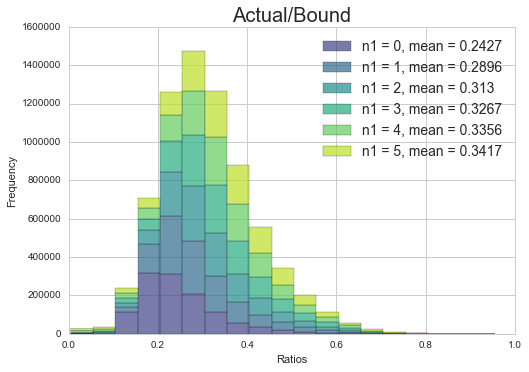

In [19]:
colormap = plt.cm.viridis
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0
fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_ns))])
plt.hist(ratios_inverse_ns, bins=bins, width=width, alpha=0.7, stacked=True, label=['n1 = 0, mean = '+str(mean_0), 'n1 = 1, mean = '+str(mean_1), 'n1 = 2, mean = '+str(mean_2), 'n1 = 3, mean = '+str(mean_3), 'n1 = 4, mean = '+str(mean_4), 'n1 = 5, mean = '+str(mean_5)])
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(fontsize=14)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()

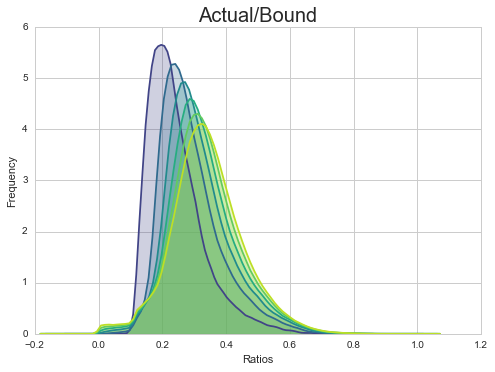

In [18]:
colormap = plt.cm.viridis
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0
fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_ns))])
for row in ratios_inverse_ns:
    sns.distplot(row, hist=False, kde_kws={"shade":True})
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(fontsize=14)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()

In [6]:
from scipy.stats import gaussian_kde

In [7]:
densities = [gaussian_kde(row) for row in ratios_inverse_ns]

In [8]:
xs = [i/400.0 for i in range(400)]
ds = []
for dnsty in densities:
    dnsty.covariance_factor = lambda : 0.25
    dnsty._compute_covariance()
    ds.append(dnsty(xs))

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


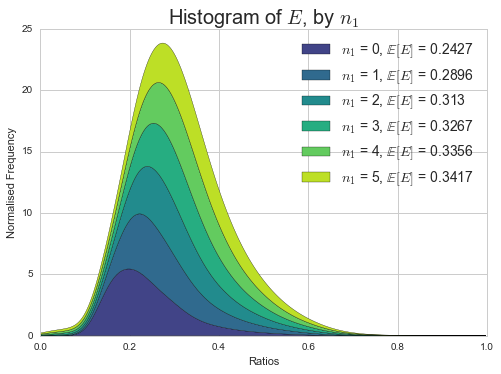

In [9]:
labs = [r"$n_1$" + ' = 0, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_0), r"$n_1$" + ' = 1, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_1), r"$n_1$" + ' = 2, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_2), r"$n_1$" + ' = 3, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_3), r"$n_1$" + ' = 4, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_4), r"$n_1$" + ' = 5, ' + r"$\mathbb{E}[E]$" + ' = '+str(mean_5)]
colormap = plt.cm.viridis
fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_ns))])
plt.stackplot(xs, ds)
plt.xlabel('Ratios')
plt.ylabel('Normalised Frequency')
plt.legend(labs, fontsize=14)
ax.set_title('Histogram of ' + r"$E$" + ', by ' + r"$n_1$", fontsize=20)
plt.show()